<a href="https://colab.research.google.com/github/INFINITY-RUBER/Curso_Deep_Learning_Con_TernsorFlow_Machine-Learning_e_IA-/blob/master/scripts/tema07/02-activation-functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 99kB/s 
     |████████████████████████████████| 3.2MB 56.7MB/s 
     |████████████████████████████████| 491kB 53.9MB/s 
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


# Funciones de Activación

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [0]:
session = tf.Session()
tf.set_random_seed(2019)
np.random.seed(2019)

In [0]:
batch_size = 50
# defino los Tensores
a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_normal(shape=[1,1]))

a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_normal(shape=[1,1]))

x = np.random.normal(loc=5,scale=0.25, size=1000)
x_data = tf.placeholder(shape=[None, 1], dtype= tf.float32)

### Función Sigmoide
$$sigmoid(x) = \sigma(x) = \frac{1}{1+e^{ax+b}}$$

In [0]:
sigmoid_act = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))

$$ e^{ax+b}$$

### Función ReLu (Rectificador Lineal Unitario)
$$f(x) = \max(0,ax+b)$$

In [0]:
relu_act = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

In [0]:
target = 0.75
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_act, target)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_act, target)))

In [0]:
my_optim = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_optim.minimize(loss1)
train_step_relu = my_optim.minimize(loss2)
init = tf.global_variables_initializer()
session.run(init)

In [0]:
loss_vect_sigmoid = []
loss_vect_relu = []
activ_sigmoid = []
activ_relu = []
for i in range(1000):
    rand_idx = np.random.choice(len(x), size = batch_size)
    x_vals = np.transpose([x[rand_idx]])
    session.run(train_step_sigmoid, feed_dict = {x_data:x_vals})
    session.run(train_step_relu, feed_dict={x_data:x_vals})
    
    loss_vect_sigmoid.append(session.run(loss1, feed_dict={x_data:x_vals}))
    loss_vect_relu.append(session.run(loss2, feed_dict={x_data:x_vals}))
    
    activ_sigmoid.append(np.mean(session.run(sigmoid_act, feed_dict={x_data:x_vals})))
    activ_relu.append(np.mean(session.run(relu_act, feed_dict={x_data:x_vals})))

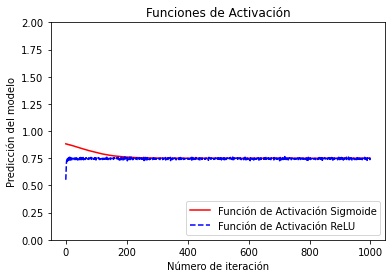

In [36]:
plt.plot(activ_sigmoid, 'r-', label="Función de Activación Sigmoide")
plt.plot(activ_relu, 'b--', label="Función de Activación ReLU")
plt.ylim([0.0,2.0])
plt.title("Funciones de Activación")
plt.xlabel("Número de iteración")
plt.ylabel("Predicción del modelo")
plt.legend(loc="lower right")
plt.show()

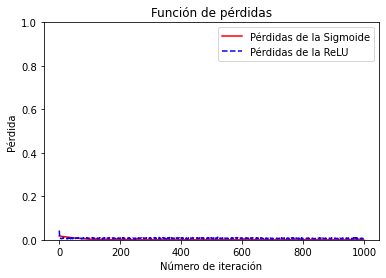

In [37]:
plt.plot(loss_vect_sigmoid, 'r-', label = "Pérdidas de la Sigmoide")
plt.plot(loss_vect_relu, 'b--', label="Pérdidas de la ReLU")
plt.ylim([0.,1.])
plt.title("Función de pérdidas")
plt.xlabel("Número de iteración")
plt.ylabel("Pérdida")
plt.legend(loc="upper right")
plt.show()